<a href="https://colab.research.google.com/github/dorbenit/nextgen-tennis-prediction/blob/main/colab_notebooks/Model_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load model Data

In [1]:
import pandas as pd

# Defining the file path for the dataset
file_path = 'df_model_clean.csv'

# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player_id                 131 non-null    int64  
 1   name                      131 non-null    object 
 2   Entry_Age                 131 non-null    float64
 3   Height                    131 non-null    float64
 4   reach_sf                  131 non-null    int64  
 5   Avg_Win_ace               131 non-null    float64
 6   Avg_Win_df                131 non-null    float64
 7   Avg_Win_svpt              131 non-null    float64
 8   Avg_Win_1stIn             131 non-null    float64
 9   Avg_Win_1stWon            131 non-null    float64
 10  Avg_Win_2ndWon            131 non-null    float64
 11  Avg_Win_SvGms             131 non-null    float64
 12  Avg_Win_bpSaved           131 non-null    float64
 13  Avg_Win_bpFaced           131 non-null    float64
 14  Avg_Win_Mi

##Initial testing of the model

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load cleaned data from CSV
df_model_clean = pd.read_csv('df_model_clean.csv')

# Define features and label
X = df_model_clean.drop(columns=['player_id', 'name', 'reach_sf'])
y = df_model_clean['reach_sf']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[18  2]
 [ 1  6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.75      0.86      0.80         7

    accuracy                           0.89        27
   macro avg       0.85      0.88      0.86        27
weighted avg       0.90      0.89      0.89        27

ROC AUC Score: 0.9785714285714286


##Testing the model with smote to check for imbalance

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# Load the cleaned dataset
df_model_clean = pd.read_csv('df_model_clean.csv')

# Define features and label
X = df_model_clean.drop(columns=['player_id', 'name', 'reach_sf'])
y = df_model_clean['reach_sf']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[17  3]
 [ 0  7]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.70      1.00      0.82         7

    accuracy                           0.89        27
   macro avg       0.85      0.93      0.87        27
weighted avg       0.92      0.89      0.89        27

ROC AUC Score: 0.9714285714285714


##Precision vs Reacall

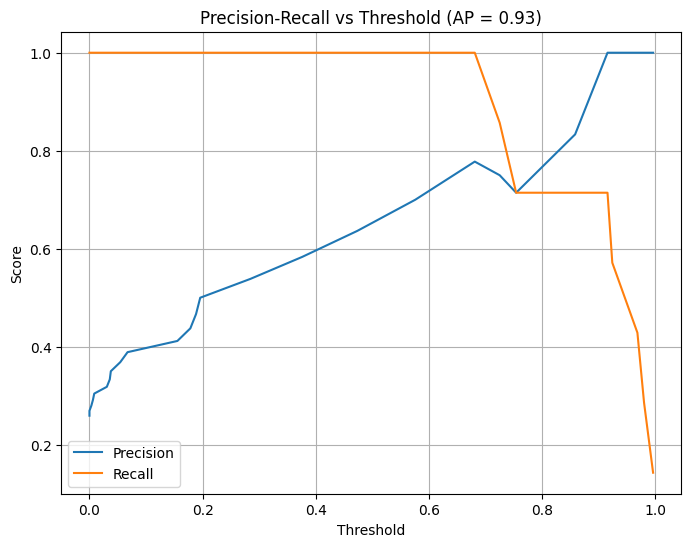

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

y_prob = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title(f"Precision-Recall vs Threshold (AP = {average_precision:.2f})")
plt.legend()
plt.grid(True)
plt.show()


##Training with different classification models

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load cleaned and preprocessed data
df = pd.read_csv("df_model_clean.csv")

# Drop non-numeric or identifier columns
X = df.drop(columns=['reach_sf', 'player_id', 'name'])
y = df['reach_sf']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train & evaluate
for name, model in models.items():
    print(f"\n Model: {name}")
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))



 Model: Logistic Regression
Confusion Matrix:
[[17  3]
 [ 0  7]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.70      1.00      0.82         7

    accuracy                           0.89        27
   macro avg       0.85      0.93      0.87        27
weighted avg       0.92      0.89      0.89        27

ROC AUC Score: 0.9714285714285714

 Model: Random Forest
Confusion Matrix:
[[17  3]
 [ 1  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.67      0.86      0.75         7

    accuracy                           0.85        27
   macro avg       0.81      0.85      0.82        27
weighted avg       0.87      0.85      0.86        27

ROC AUC Score: 0.8857142857142858

 Model: XGBoost
Confusion Matrix:
[[18  2]
 [ 0  7]]

Classification Report:
              precision   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:59:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# Load cleaned dataset
df = pd.read_csv('df_model_clean.csv')

# Drop identifier/text columns
X = df.drop(columns=['reach_sf', 'name', 'player_id'], errors='ignore')  # ignore in case one doesn't exist
y = df['reach_sf']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Grid search for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train_smote, y_train_smote)

# Best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

# Evaluation
print(" Best Parameters:", grid_search.best_params_)
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n Classification Report:")
print(classification_report(y_test, y_pred))
print(" ROC AUC Score:", roc_auc_score(y_test, y_prob))

 Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}

 Confusion Matrix:
[[17  3]
 [ 1  6]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.67      0.86      0.75         7

    accuracy                           0.85        27
   macro avg       0.81      0.85      0.82        27
weighted avg       0.87      0.85      0.86        27

 ROC AUC Score: 0.8857142857142858
